# Critical Exponent Fit

In this notebook we fit power law to our transient lifetime means.

## Imports

In [1]:
# Assume we're running from project root
%cd .. 

/Users/cfn18/Documents/PhD-Work/Thesis-Computing/Determinisitc/l96_ebm_boundary_crisis


In [2]:
from thesis_plots.core import init_2d_fax

# Local imports
from src.transient_lifetimes import TransientLifetimeResult

# Other imports
from pathlib import Path
import matplotlib.pyplot as plt
import pandas as pd

## Plot/Data Locations

In [3]:
# plot_pd = Path('plots')
plot_pd = Path('/Users/cfn18/Documents/PhD-Work/Thesis/img/Tipping-Points/')
data_pd = Path('data')
config_pd = Path('cfg')

## Critical Exponent Fit

In [4]:
# Load lifetime data

csv_file = data_pd/'transient_lifetime_better_ic.csv'
df = pd.read_csv(csv_file)

sb_lifetimes = TransientLifetimeResult(df, 'sb')
w_lifetimes = TransientLifetimeResult(df, 'w')

/Users/cfn18/Documents/PhD-Work/Thesis-Computing/Determinisitc/l96_ebm_boundary_crisis/src/transient_lifetimes.py:126: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.df.dropna(inplace=True)
/Users/cfn18/Documents/PhD-Work/Thesis-Computing/Determinisitc/l96_ebm_boundary_crisis/src/transient_lifetimes.py:126: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.df.dropna(inplace=True)


(<Figure size 401.569x248.183 with 1 Axes>,
 <AxesSubplot:title={'center':'$S_{SB \\to W} = 14.91\\pm0.01$, $\\gamma = 6.18\\pm0.20$'}, xlabel='$\\log(|S - S_{SB \\to W}|)$', ylabel='$\\log(\\tau)$'>)

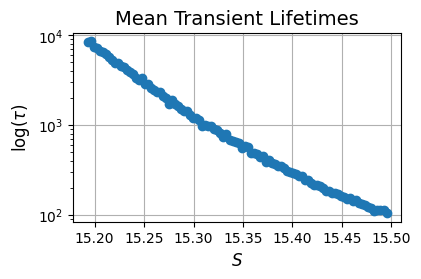

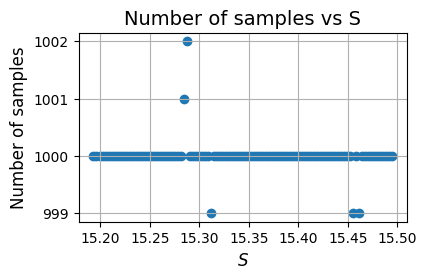

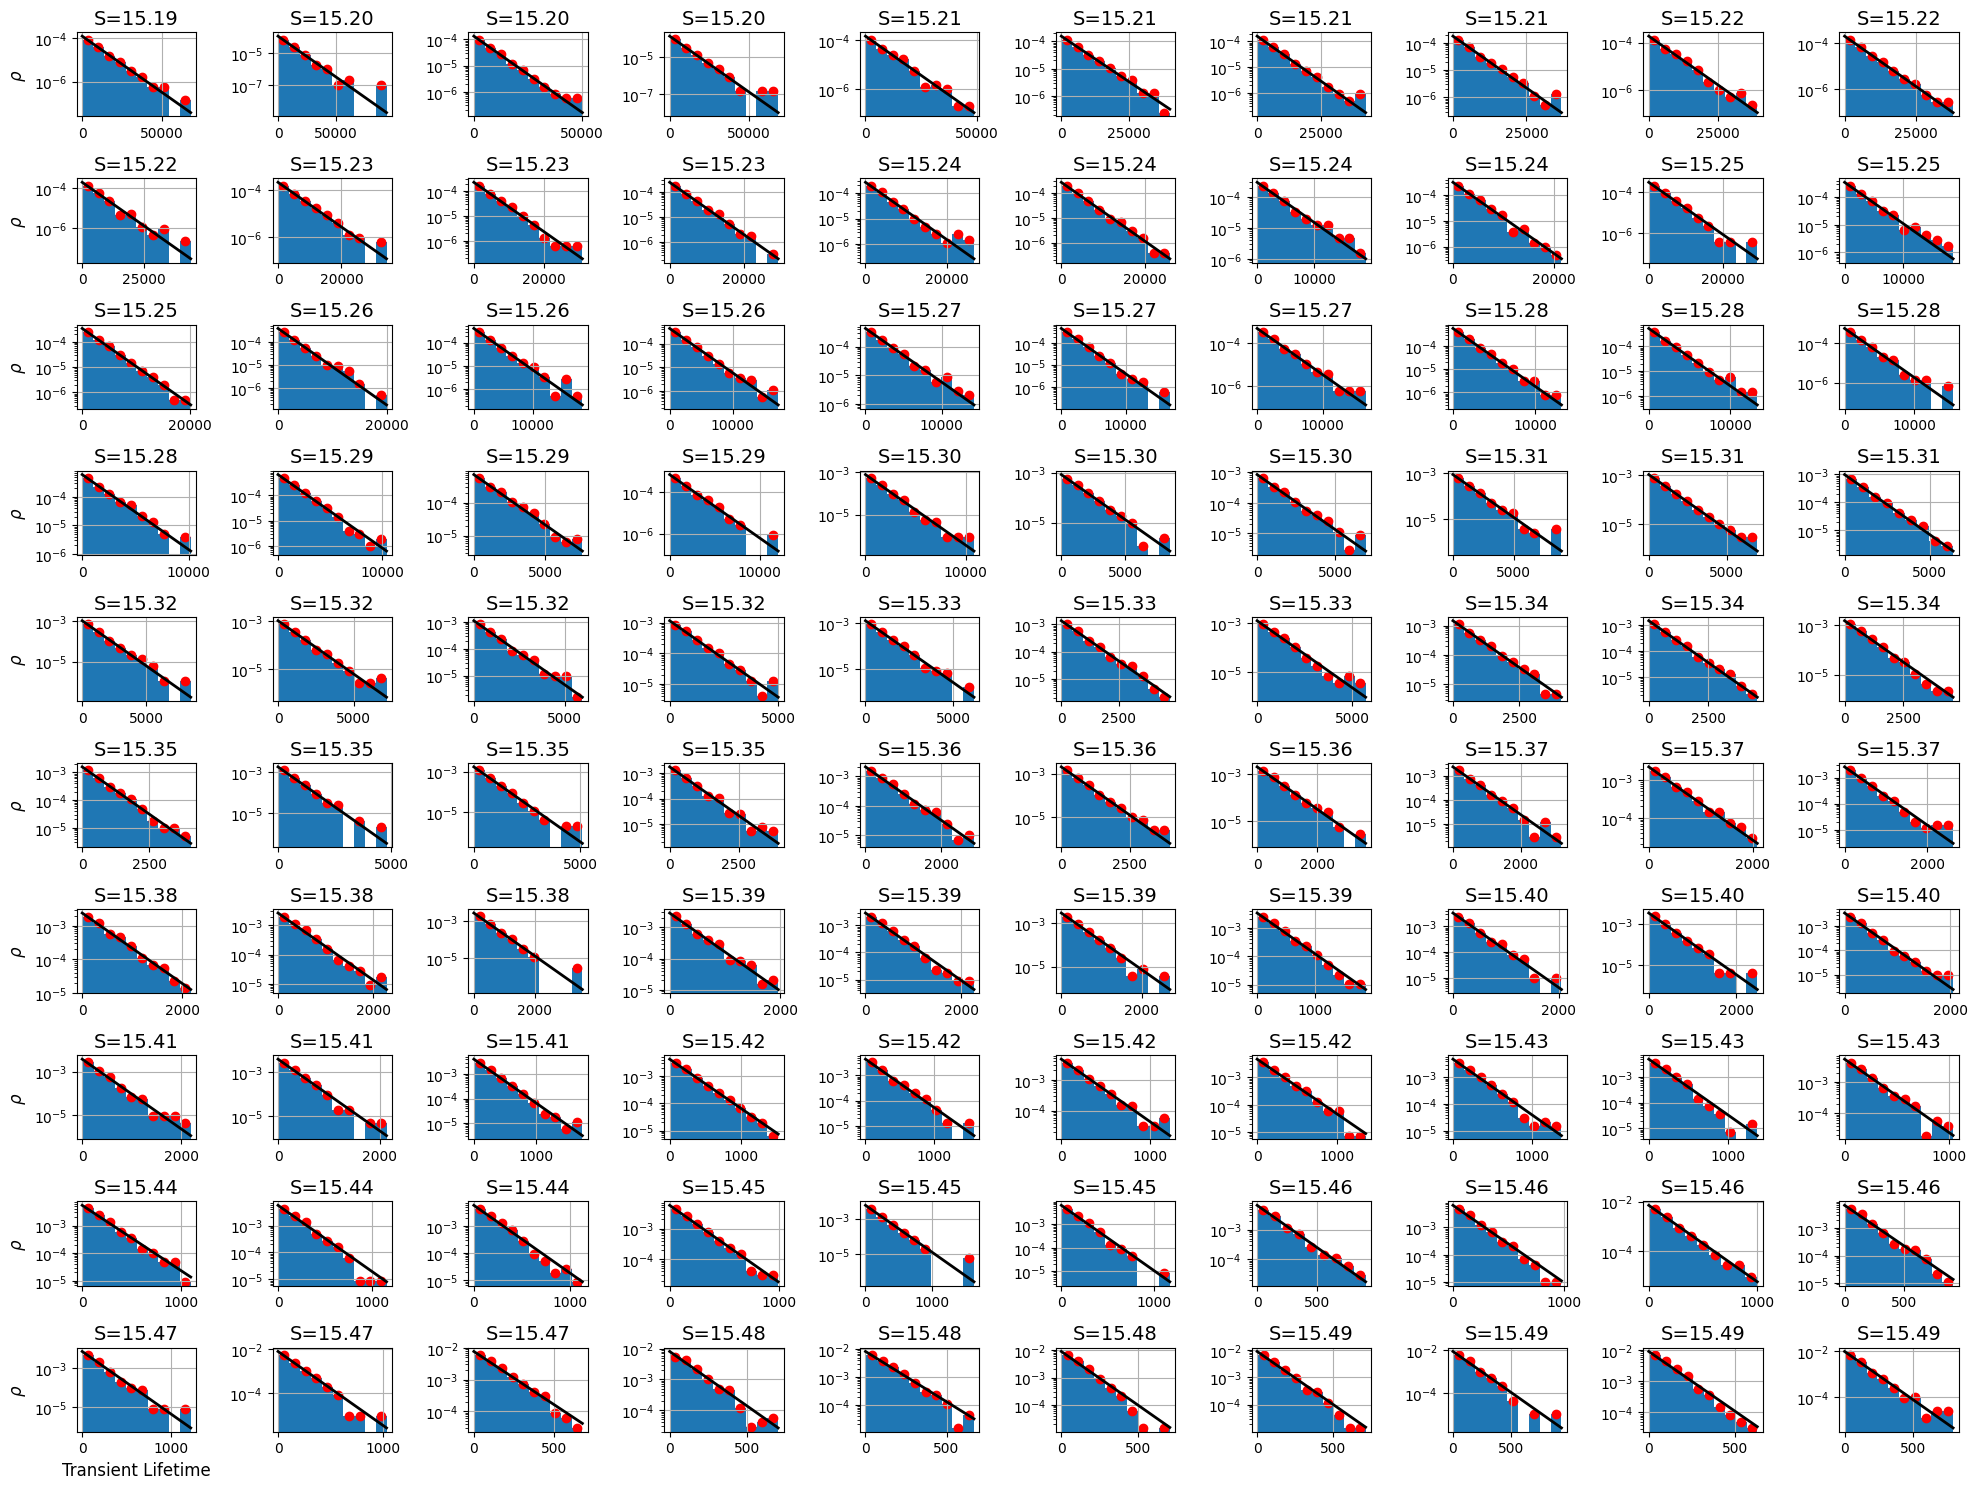

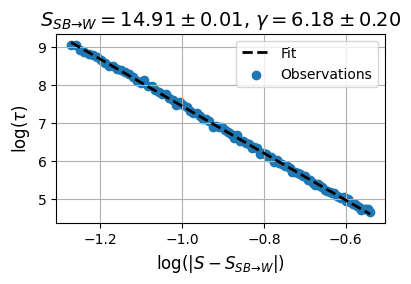

In [5]:
sb_lifetimes.plot_mean_tipping_time()
sb_lifetimes.plot_number_of_samples()
sb_lifetimes.all_tipping_time_histograms()
sb_lifetimes.plot_scaling_lawfit()

(<Figure size 401.569x248.183 with 1 Axes>,
 <AxesSubplot:title={'center':'Transient Lifetimes PDF, S=15.38'}, xlabel='Transient Lifetime', ylabel='$\\rho$'>)

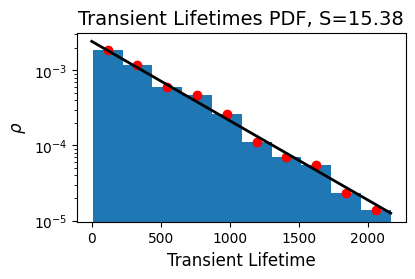

In [6]:
sb_lifetimes.tipping_time_histogram_list(60)

(<Figure size 401.569x248.183 with 1 Axes>,
 <AxesSubplot:title={'center':'$S_{W \\to SB} = 7.91\\pm0.01$, $\\gamma = 6.55\\pm0.21$'}, xlabel='$\\log(|S - S_{W \\to SB}|)$', ylabel='$\\log(\\tau)$'>)

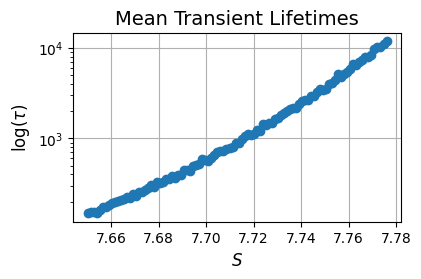

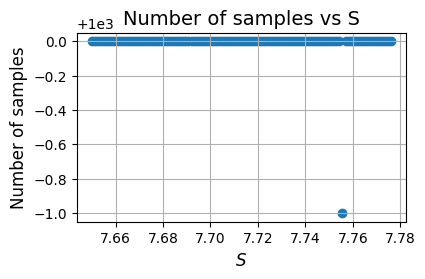

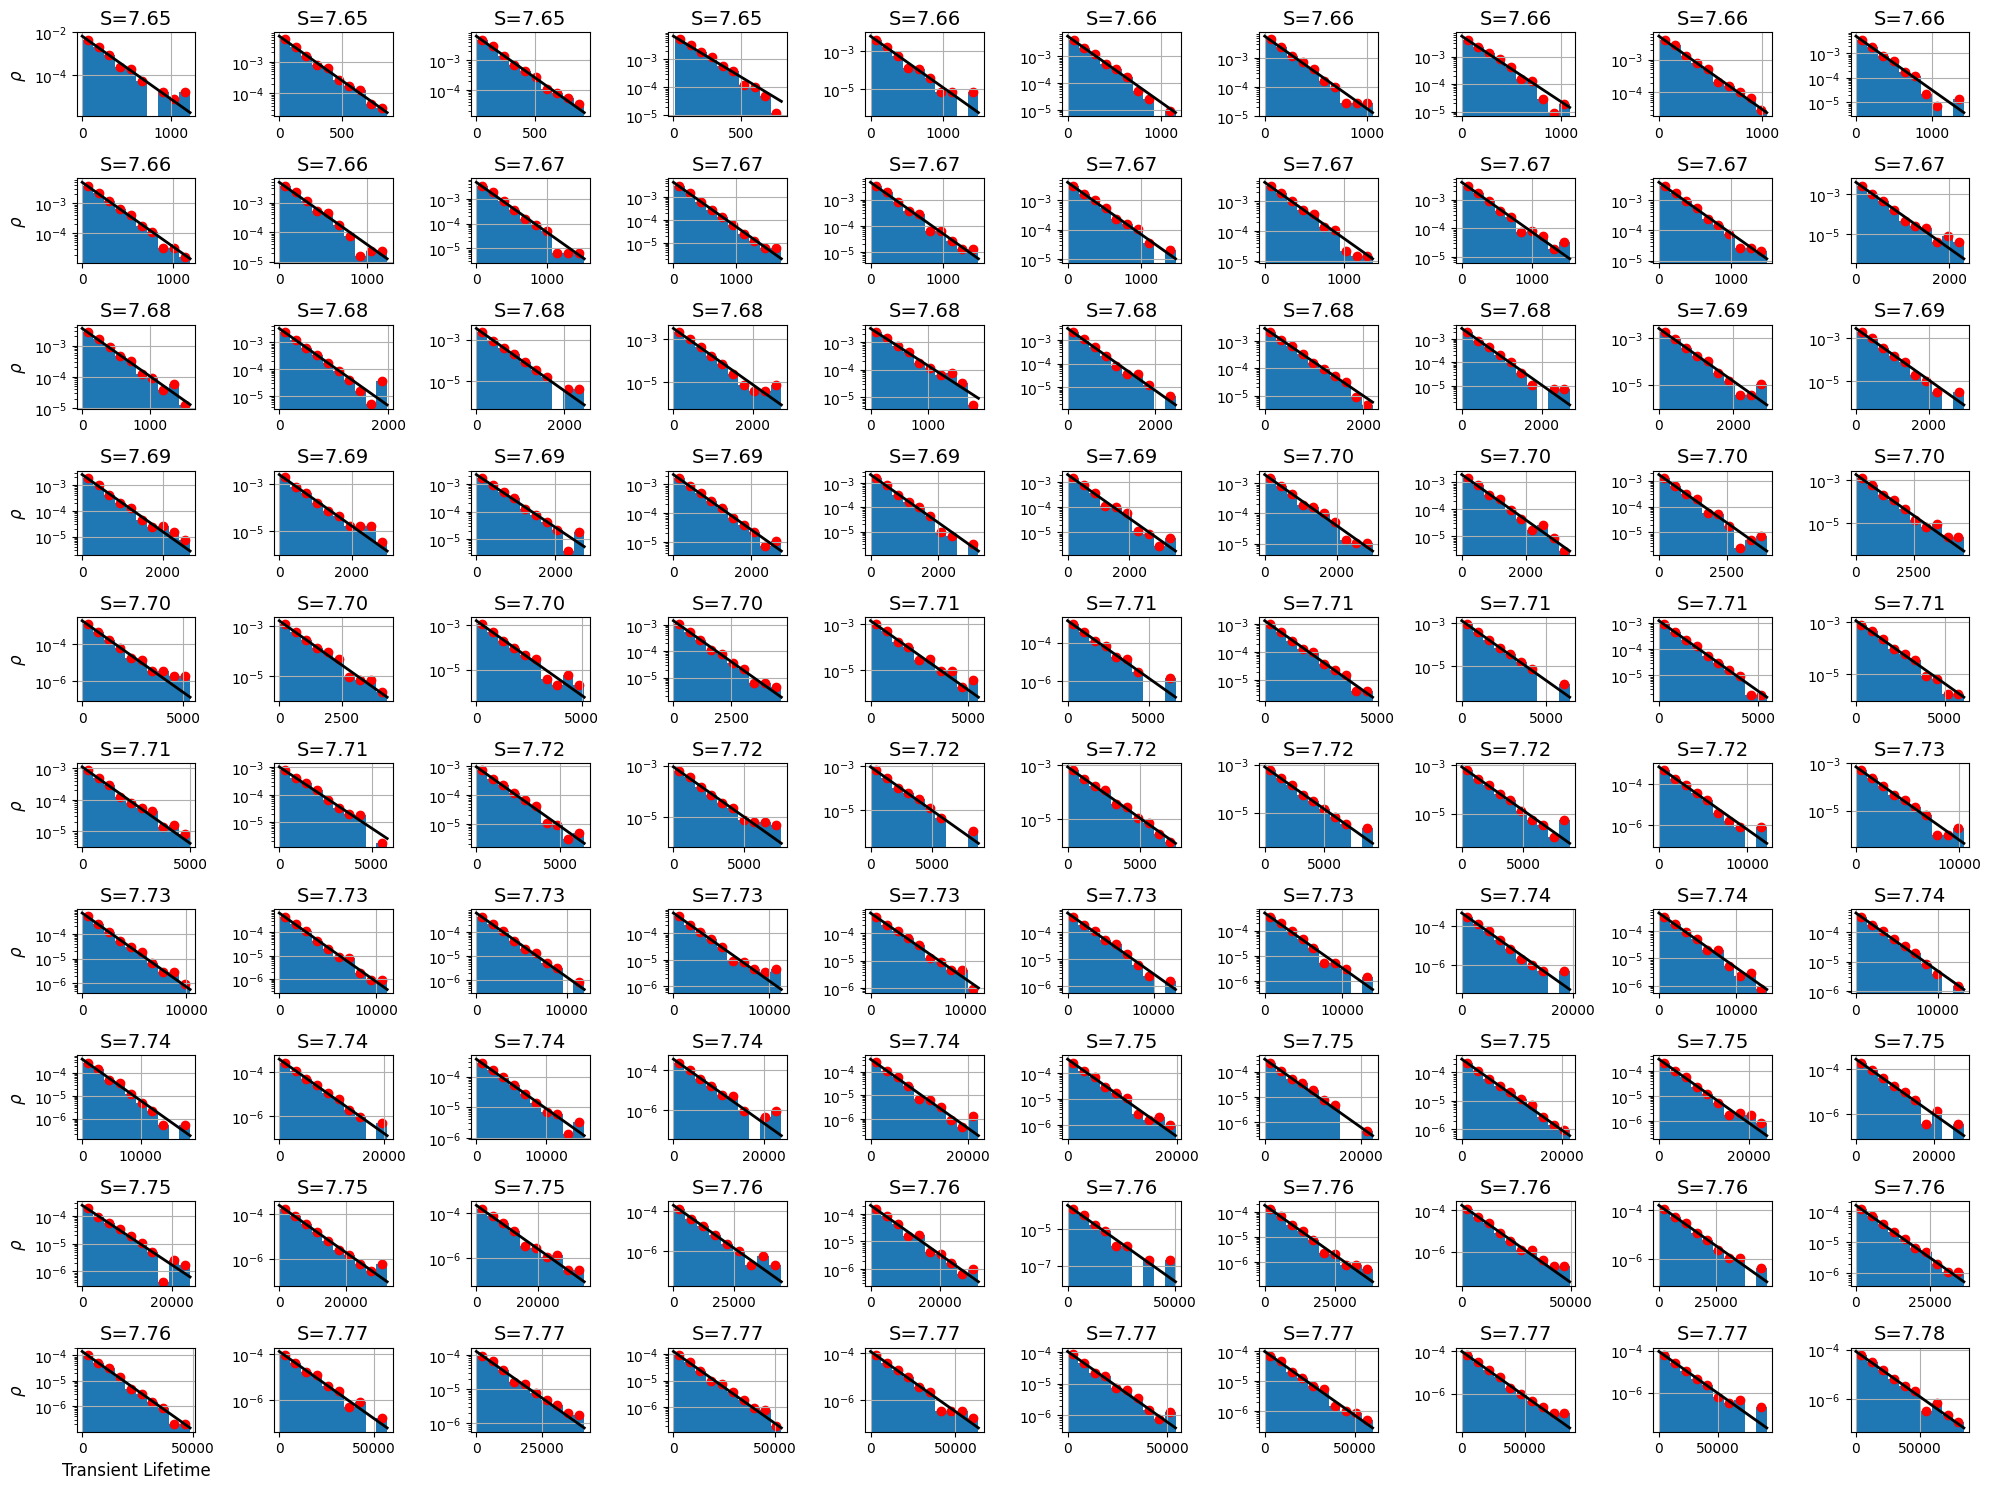

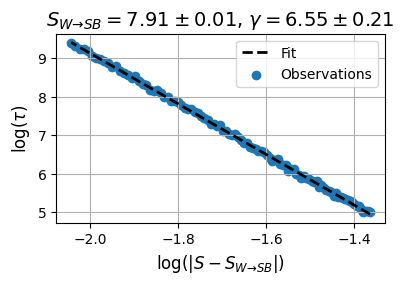

In [7]:
w_lifetimes.plot_mean_tipping_time()
w_lifetimes.plot_number_of_samples()
w_lifetimes.all_tipping_time_histograms()
w_lifetimes.plot_scaling_lawfit()

(<Figure size 401.569x248.183 with 1 Axes>,
 <AxesSubplot:title={'center':'Transient Lifetimes PDF, S=7.73'}, xlabel='Transient Lifetime', ylabel='$\\rho$'>)

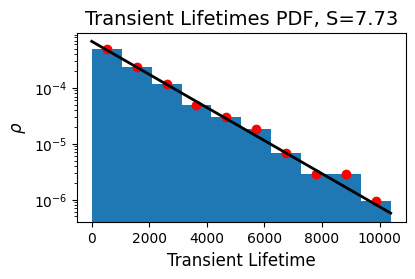

In [8]:
w_lifetimes.tipping_time_histogram_list(60)

# Estimating Range to Look at

In [9]:
min_tau = 1.e2
max_tau = 1.e4


# SB - > W
min_S = sb_lifetimes.estimate_S_from_tau(min_tau)
max_S = sb_lifetimes.estimate_S_from_tau(max_tau)
print(f'For SB to W we should look at range {min_S:.3f} to {max_S:.3f}')

# W -> SB
min_S = w_lifetimes.estimate_S_from_tau(min_tau)
max_S = w_lifetimes.estimate_S_from_tau(max_tau)
print(f'For W to SB we should look at range {min_S:.3f} to {max_S:.3f}')

For SB to W we should look at range 15.494 to 15.189
For W to SB we should look at range 7.636 to 7.772


## Make a plot for the thesis

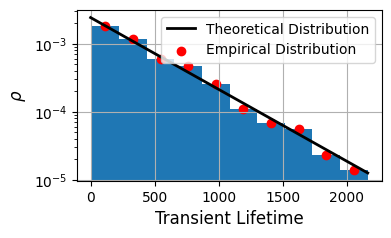

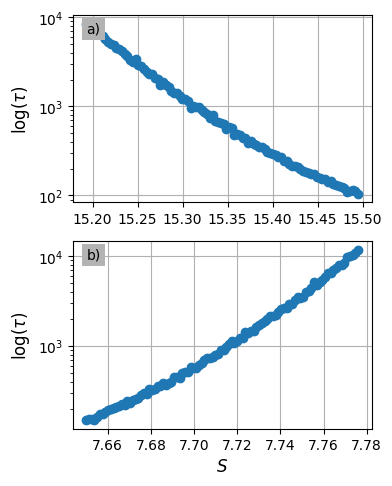

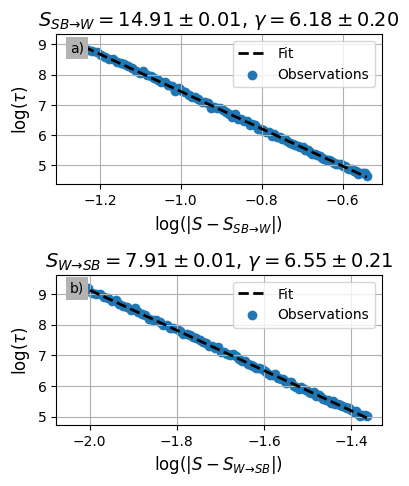

In [10]:

# Plot example Histograms
fig, ax = init_2d_fax()
sb_lifetimes.tipping_time_histogram_list(60, fax=[fig, ax])
ax.grid()
ax.legend()
ax.set_title('')
fig.tight_layout()
fig.savefig(plot_pd/'Example-Transient-Lifetime-Histograms.pdf')

# Plot Mean Tipping Time
fig, axes = init_2d_fax(nrows=2)
ax = axes[0]
sb_lifetimes.plot_mean_tipping_time(fax=[fig, ax])
ax.set_xlabel('')
ax = axes[1]
w_lifetimes.plot_mean_tipping_time(fax=[fig, ax])
for ax in axes:
    ax.set_title('')

fig.tight_layout()
fig.savefig(plot_pd/'Mean-Transient-Lifetimes.pdf')

# Plot Scaling Law Fits
fig, axes = init_2d_fax(nrows=2)
ax = axes[0]
sb_lifetimes.plot_scaling_lawfit(fax=[fig, ax])
ax = axes[1]
w_lifetimes.plot_scaling_lawfit(fax=[fig, ax])
fig.tight_layout()
fig.savefig(plot_pd/'Scaling-Law-Fits.pdf')

# Print Results in Latex

In [11]:
# latex_ds = SBTransientLifetimes.mean_lifetimes()[5:].sort_values('distance_from_crit')
# latex_ds['S'] = latex_ds.index
# print(latex_ds[['S', 'distance_from_crit', 'mean_tipping_time', 'sample_size', 'standard_error']].round(decimals=2).to_latex(index=False))
# latex_ds.columns